In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


In [3]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x=dataset.iloc[:,0:8]
y=dataset['Outcome']

rus = RandomUnderSampler(random_state=0)
X_resampled, Y_resampled = rus.fit_resample(x, y)

In [5]:
new_df = pd.concat([X_resampled,Y_resampled], axis=1)
new_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
531,1,128,88,39,110,36.5,1.057,37,1
532,0,123,72,0,0,36.3,0.258,52,1
533,6,190,92,0,0,35.5,0.278,66,1
534,9,170,74,31,0,44.0,0.403,43,1
535,1,126,60,0,0,30.1,0.349,47,1


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, random_state = 0)
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
101,3,125,58,0,0,31.6,0.151,24
97,1,99,58,10,0,25.4,0.551,21
202,10,122,68,0,0,31.2,0.258,41
54,2,81,60,22,0,27.7,0.290,25
30,1,117,60,23,106,33.8,0.466,27


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors = 15) 
knn_model.fit(x_train, y_train)
knn_model.score(x_test,y_test)

0.7089552238805971

In [42]:
y_pred = knn_model.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0], dtype=int64)

In [43]:
accuracy_score(y_test, y_pred)

0.7089552238805971

In [45]:
df_0 = new_df[new_df['Outcome'] == 0]
df_1 = new_df[new_df['Outcome'] == 1]

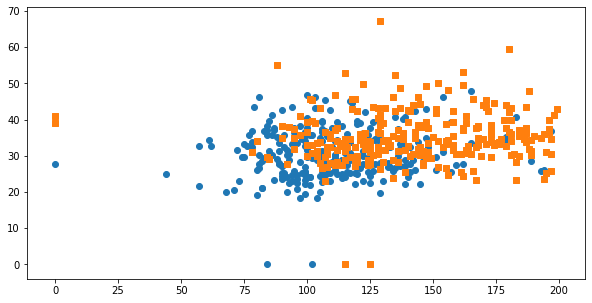

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_0['Glucose'], df_0['BMI']) # class = 0 circle points 
ax.scatter(df_1['Glucose'], df_1['BMI'],marker='s') # class = 1 square points
x_min, x_max = ax.get_xlim()